## 1. Loading dependencies

In [177]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

# %matplotlib inline

# np.set_printoptions(formatter={'float_kind':'{:f}'.format})
# sns.set(rc={'figure.figsize':(12,10)})

## 2. Loading raw data

In [178]:
raw_data = pd.read_csv("./marketing_war_data.csv")
print(raw_data.shape)
raw_data.head(5)
# converting columns into snake case standard
my_sanitized_columns = []
for column in raw_data.columns:
    regex_column = str(re.sub(r'[^A-Za-z0-9]+', ' ', column)).strip().lower().replace(" ","_")
    my_sanitized_columns.append(regex_column)

raw_data.columns = my_sanitized_columns

(185, 11)


## 3. Data Preprocessing
3.1 Exploratory data analysis (EDA)

In [179]:
# checking for null values
raw_data.isnull().sum()

date               0
week               3
week_id            3
month              3
month_id           3
year               3
day_name           3
visitors           3
revenue            3
marketing_spend    3
promo              3
dtype: int64

In [180]:
# visualize NULL values
raw_data[raw_data["week"].isnull()]

,date,week,week_id,month,month_id,year,day_name,visitors,revenue,marketing_spend,promo
182,10/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,11/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,12/05/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# deleting null values
raw_data =  raw_data.dropna(subset=['week'])

In [182]:
# retest nulls
raw_data.isnull().sum()

date               0
week               0
week_id            0
month              0
month_id           0
year               0
day_name           0
visitors           0
revenue            0
marketing_spend    0
promo              0
dtype: int64

In [183]:
# investigating each feature
for column in raw_data:
    unique_values = np.unique(raw_data[column])
    value_count = len(unique_values)
    if(value_count<10):
        print(f"Feature: {column}, Values: {unique_values} & Value Count: {value_count}")
    else:
        print(f"Feature: {column}, Value Count: {value_count}")

Feature: date, Value Count: 182
Feature: week, Value Count: 28
Feature: week_id, Value Count: 28
Feature: month, Values: [1.000000 2.000000 3.000000 4.000000 5.000000 11.000000 12.000000] & Value Count: 7
Feature: month_id, Values: [11.000000 12.000000 13.000000 14.000000 15.000000 16.000000 17.000000] & Value Count: 7
Feature: year, Values: [2020.000000 2021.000000] & Value Count: 2
Feature: day_name, Values: ['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday'] & Value Count: 7
Feature: visitors, Value Count: 175
Feature: revenue, Value Count: 181
Feature: marketing_spend, Value Count: 182
Feature: promo, Values: ['No Promo' 'Promotion Blue' 'Promotion Red'] & Value Count: 3


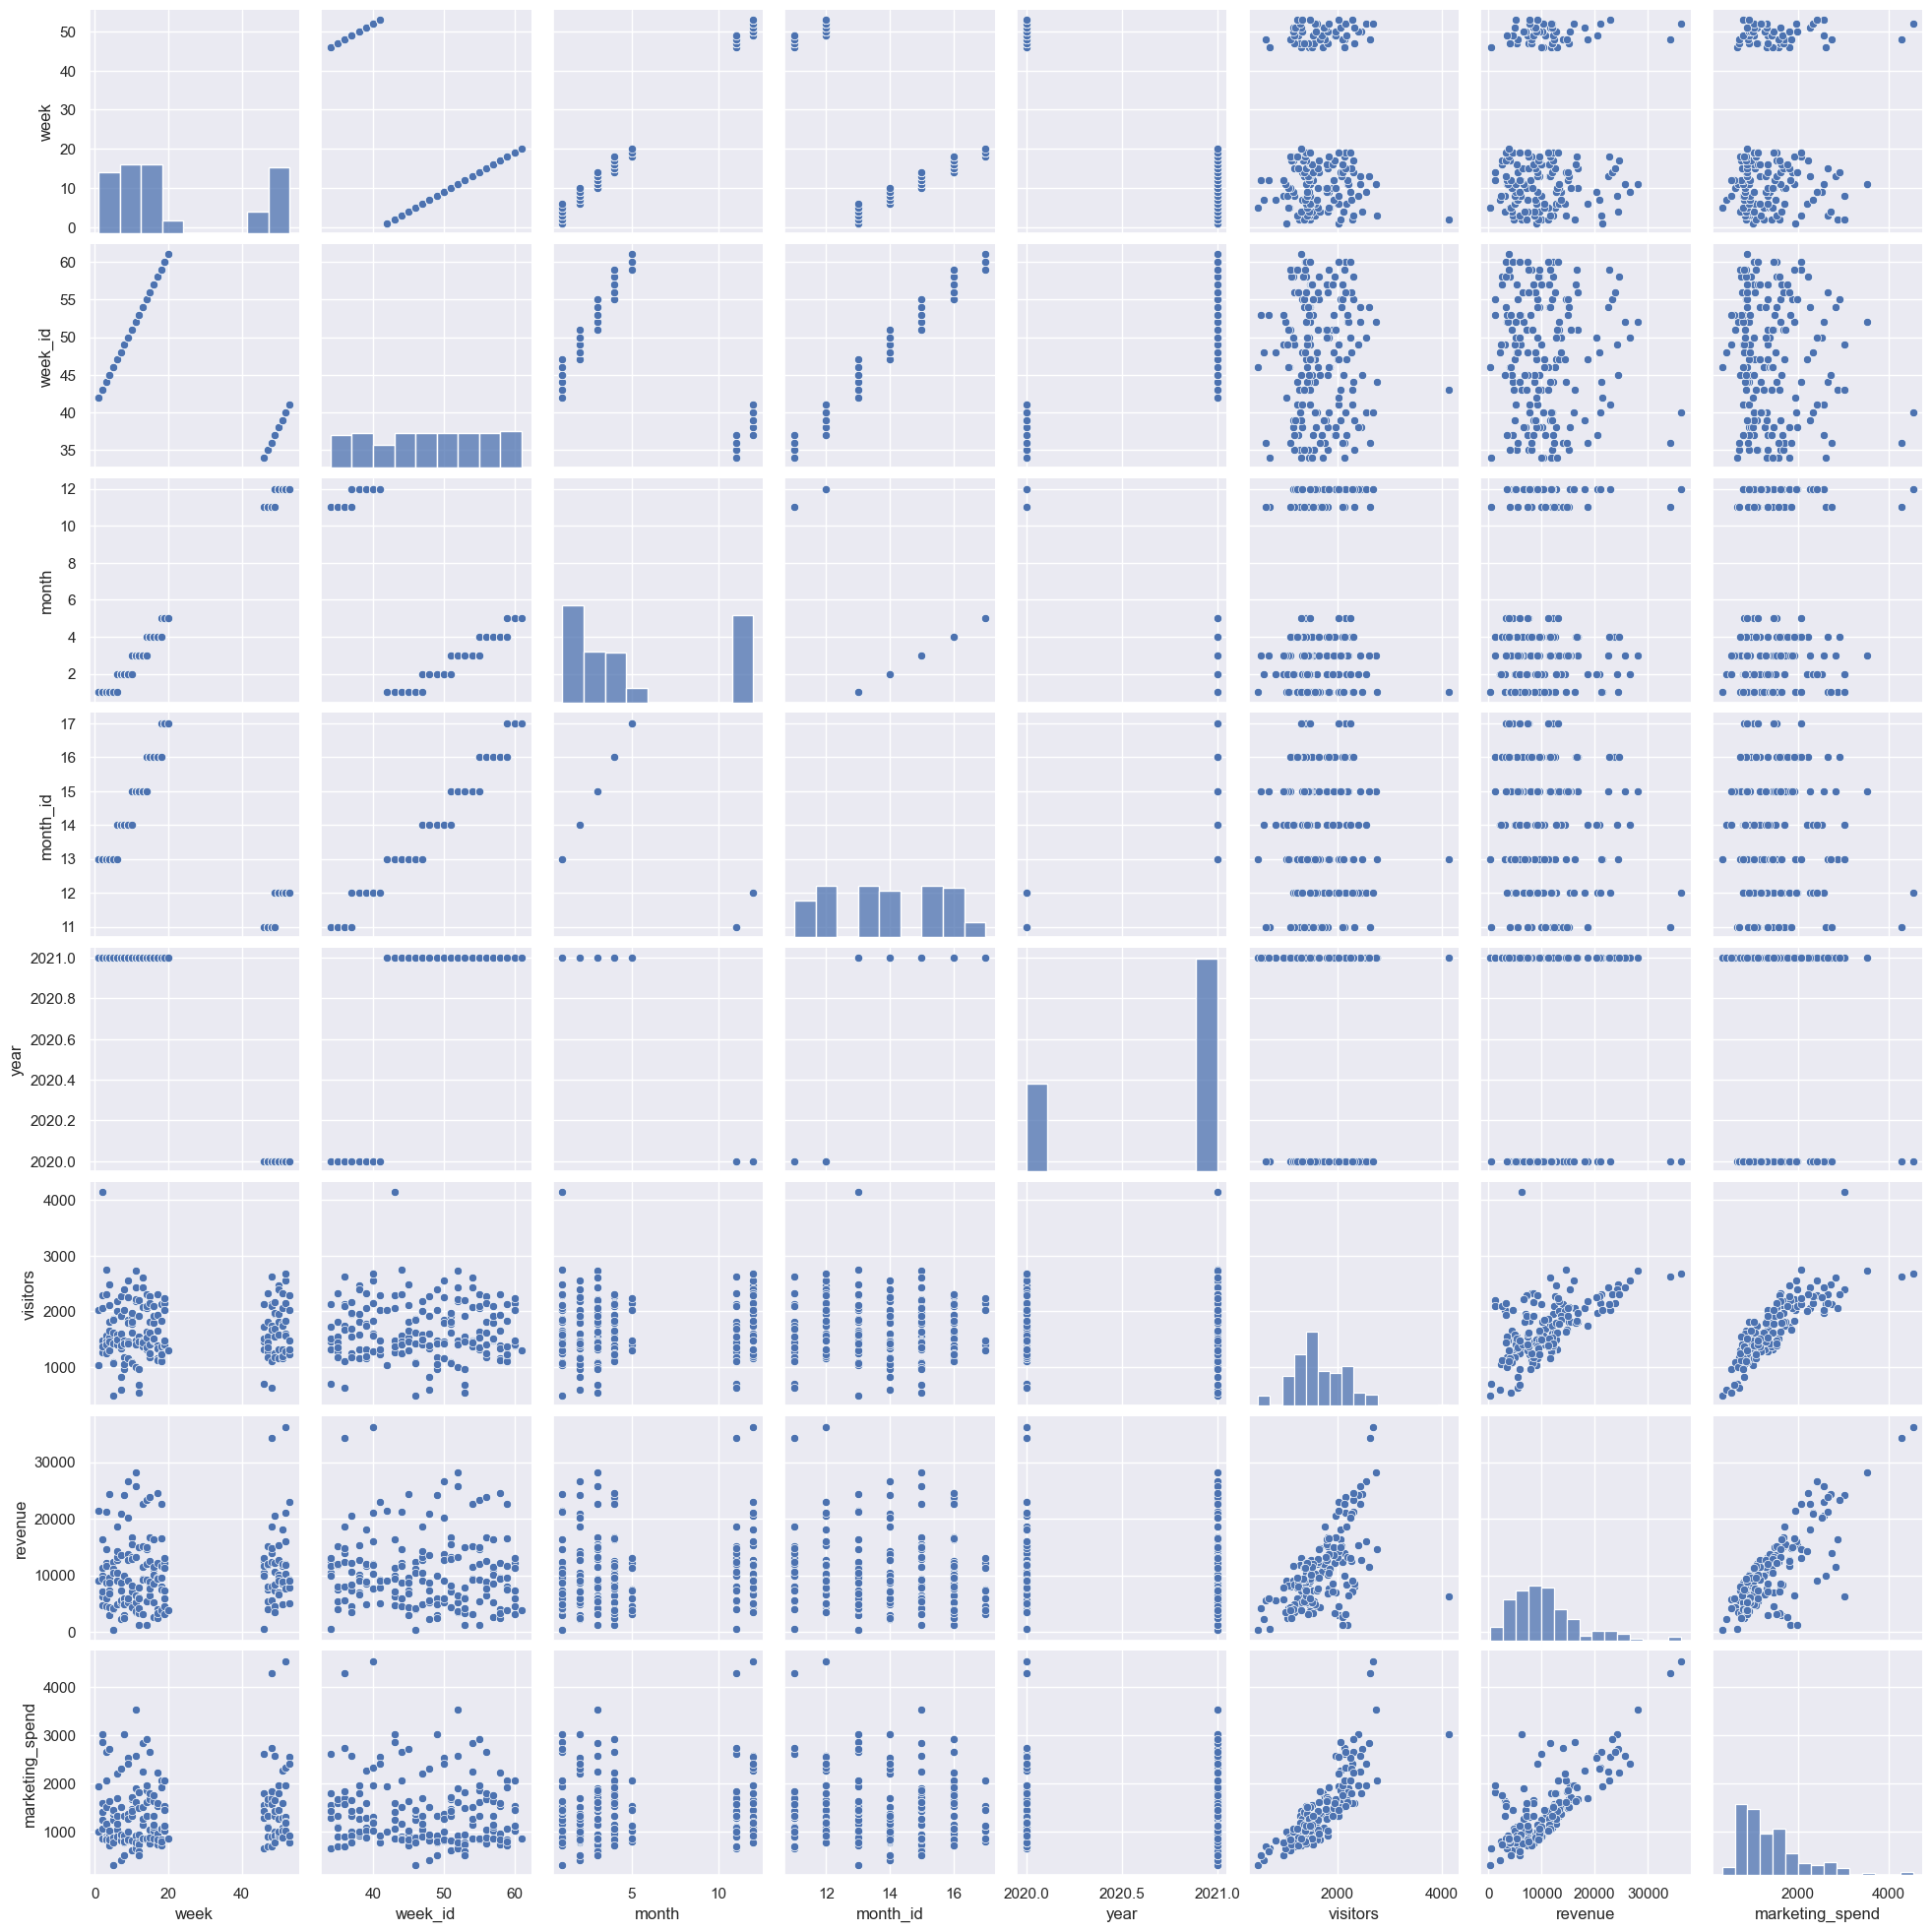

In [184]:
# visualize data using pair plot
# pair plot compares all the numeric features with all the numeric features
# DO NOT RUN IT ON A BIGGER DATASET
g = sns.pairplot(raw_data)

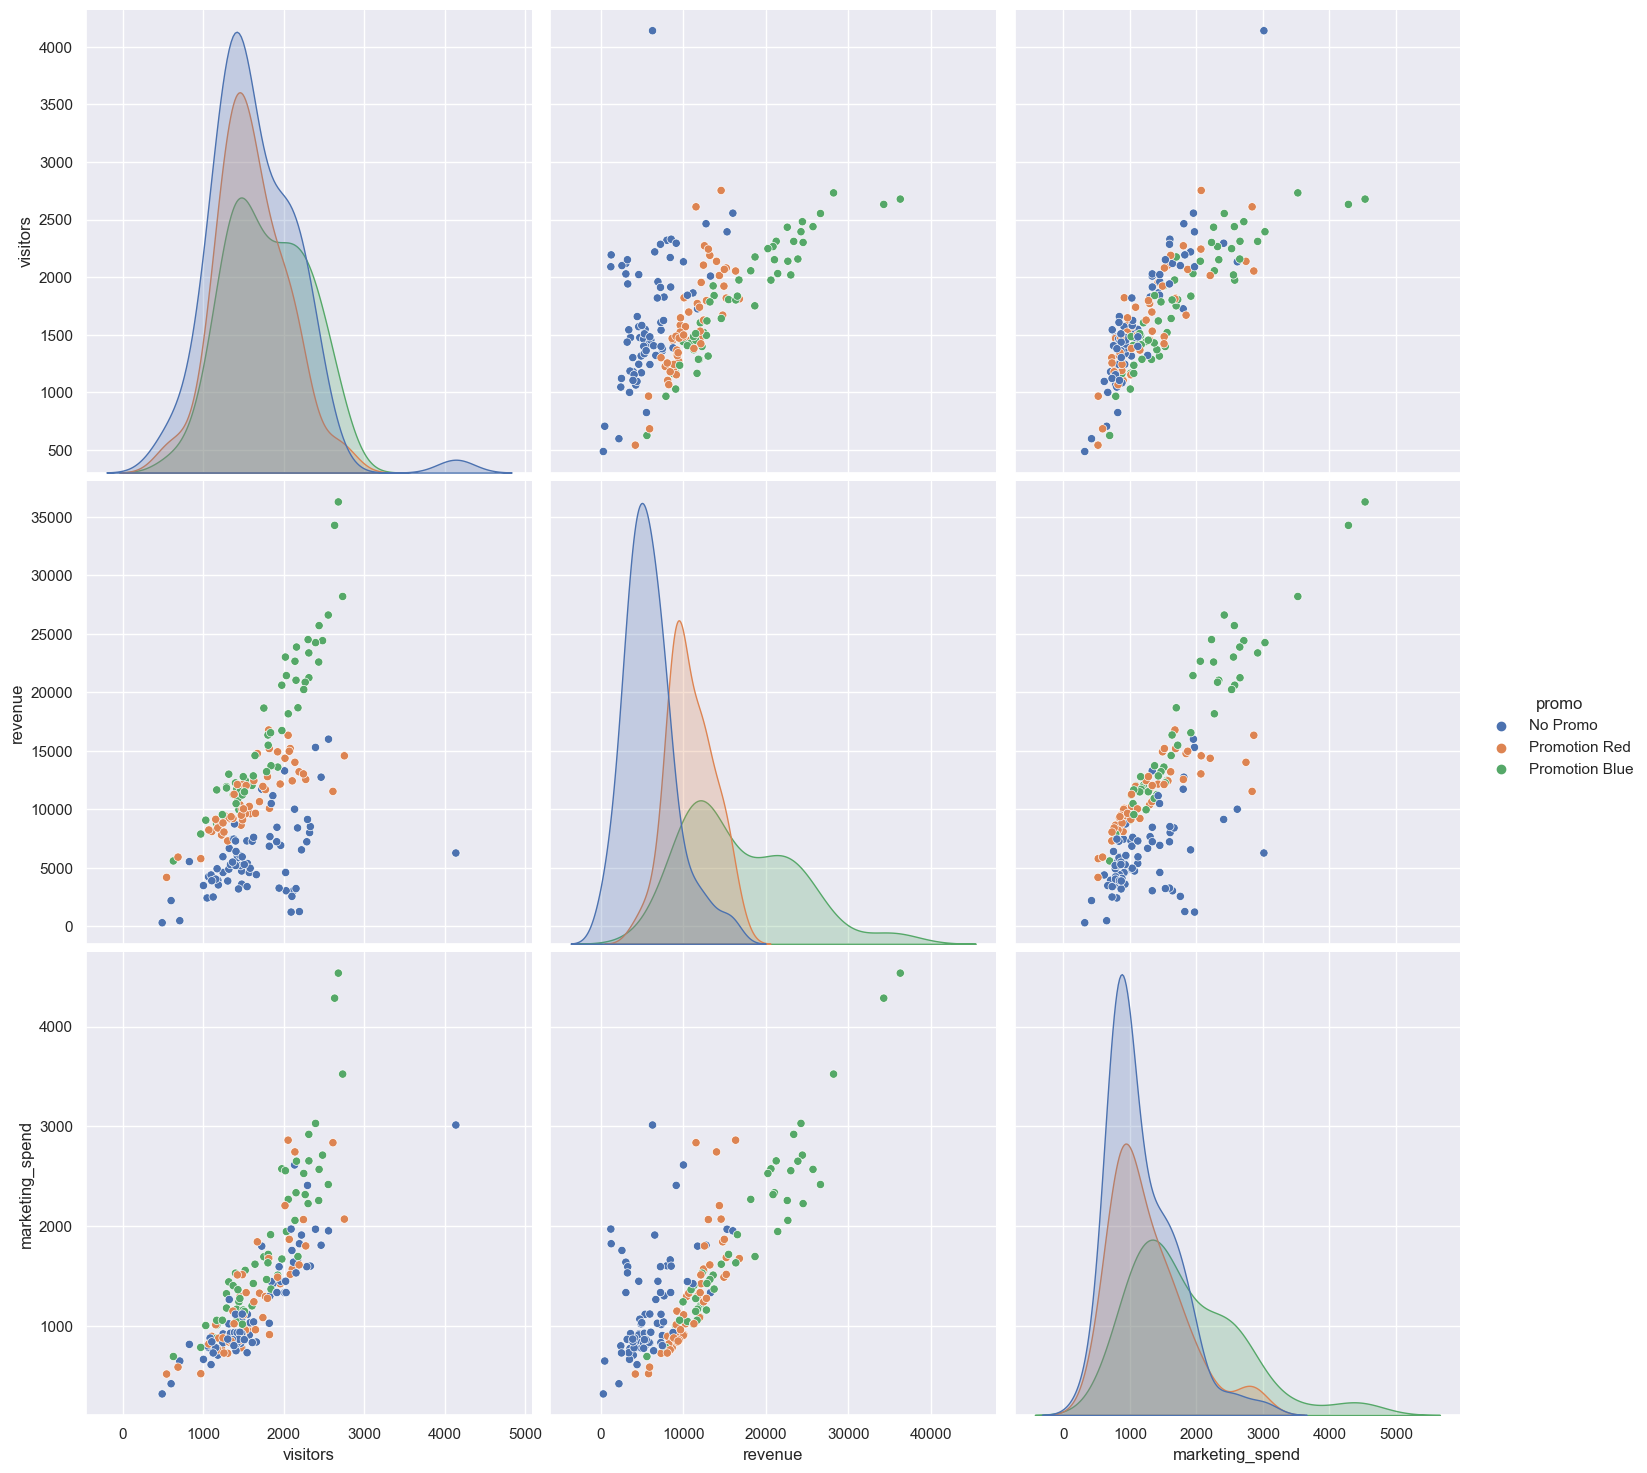

In [185]:
g = sns.pairplot(raw_data[["visitors", "revenue", "marketing_spend", "promo"]], hue='promo', height=5)

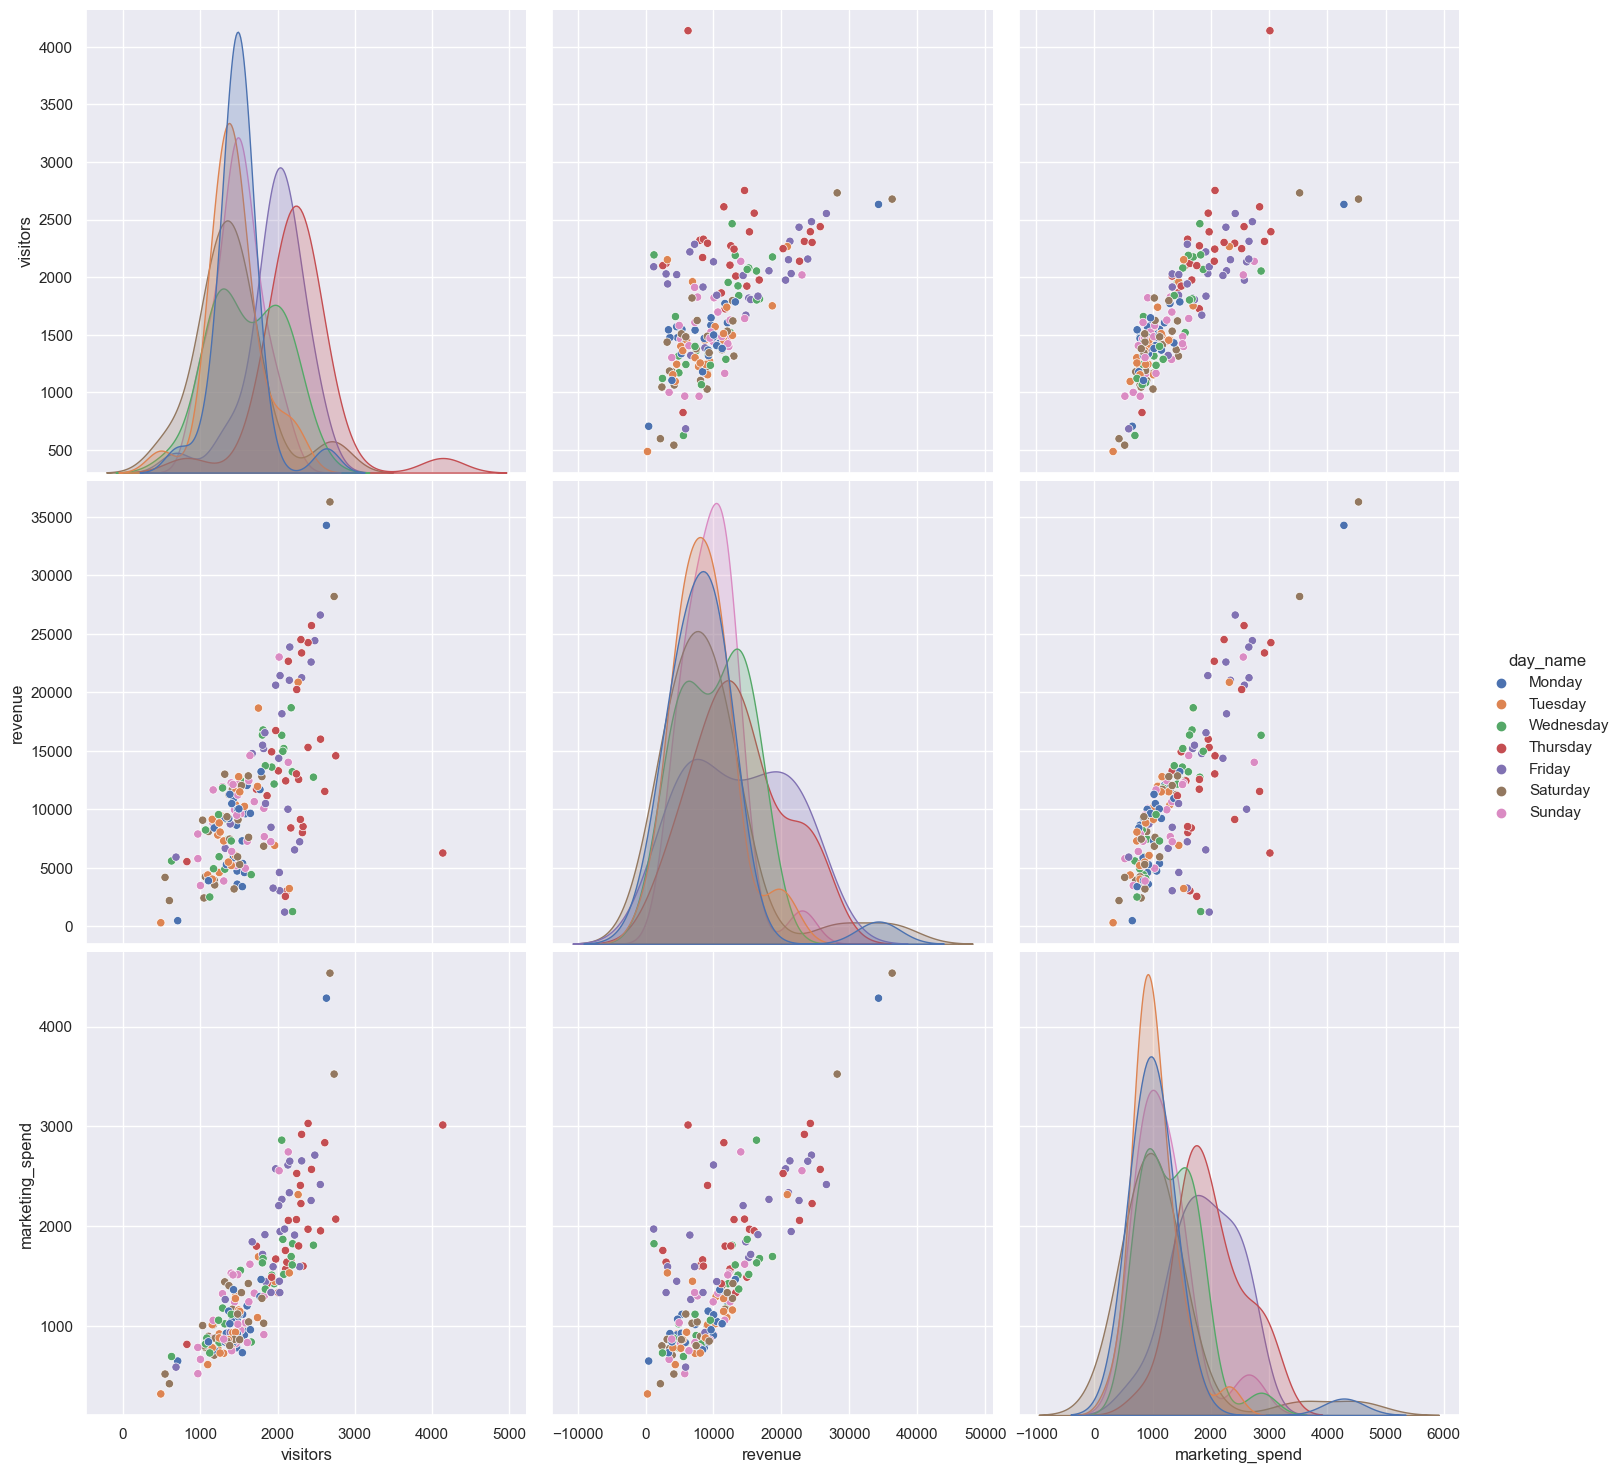

In [186]:
g = sns.pairplot(raw_data[["visitors", "revenue", "marketing_spend", "day_name"]], hue='day_name', height=5)

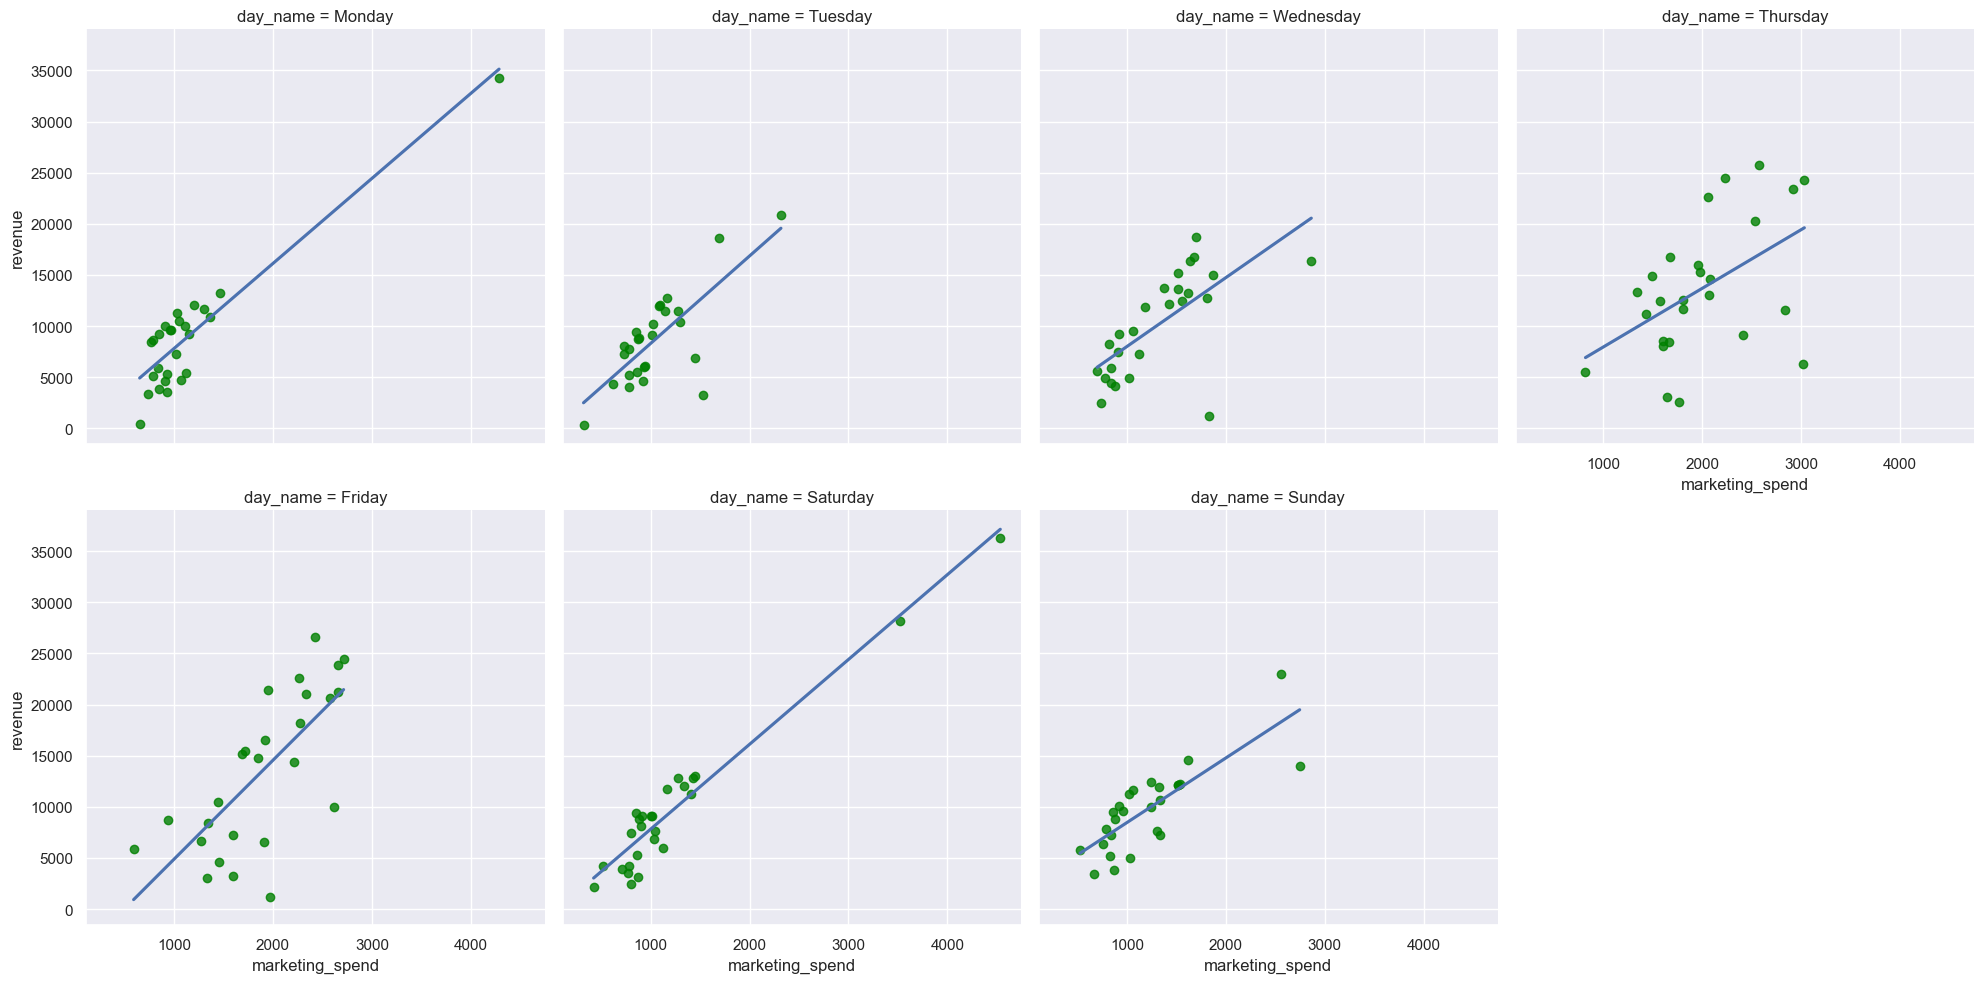

In [187]:
g = sns.lmplot(x = "marketing_spend", y='revenue', data= raw_data, col = "day_name", col_wrap=4, height=5, scatter_kws={'color':'green'}, ci = False)

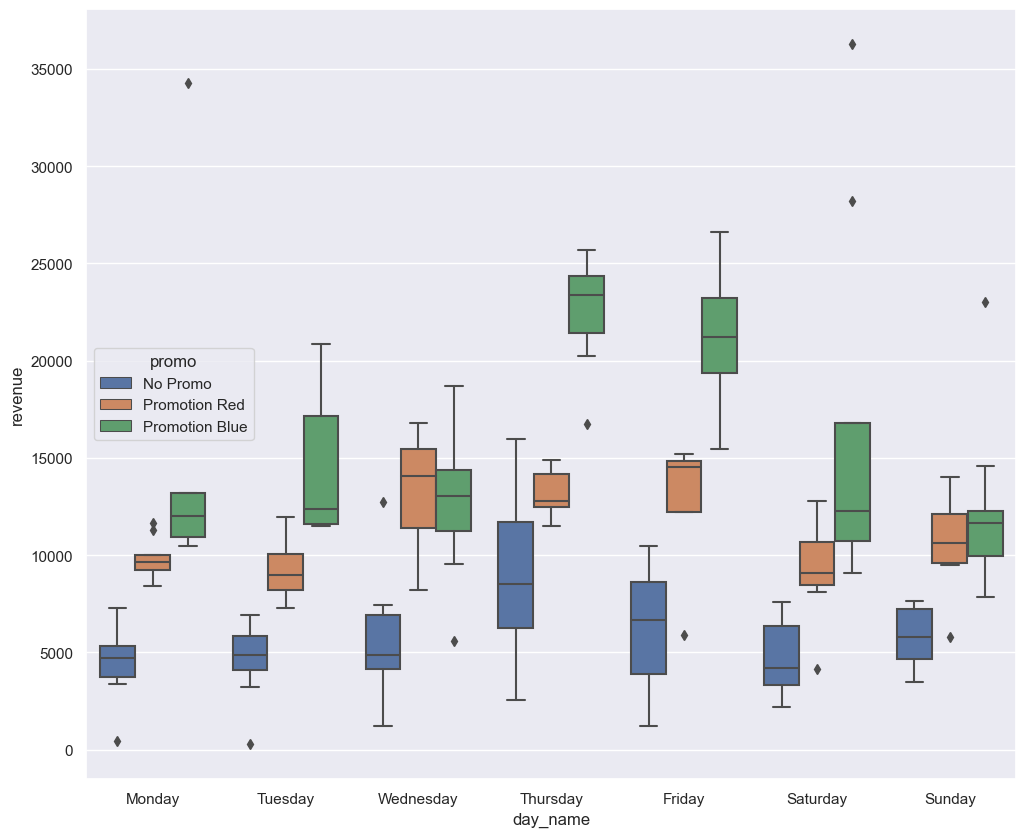

In [188]:
# investigate distributin of revenue by categorical variables
g = sns.boxplot(x = "day_name", y='revenue', data= raw_data, hue = "promo")


# the dots in the boxplot are outliers / anomalies, we want to remove them
# in real scenario it is not necessary to remove these they may cause overfitting.

In [189]:
# removing outliers

raw_data = raw_data[raw_data['revenue']<27000]
raw_data.shape

(179, 11)